In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
from tqdm import tqdm
from scipy.fft import fftshift
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)
ds = xr.open_dataset("GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")

# data files
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

In [3]:
catalog

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,1.178415e-03,1.0,10.00,4.971506,0.939436
1,1,3,-20.5460,-175.3900,2022-01-15 04:14:45.000,5.8,POINT (-20.546 -175.39),5.4,0.0,6.907373e-11,0.998325,1.674875e-03,1.0,0.00,2.485465,1.146643
2,2,4,-7.0422,105.2063,2022-01-14 09:49:20.820,5.4,POINT (-7.0422 105.2063),5.4,0.0,6.907373e-11,0.999999,6.002016e-07,1.0,34.46,0.527750,1.068970
3,3,5,-6.8600,105.2887,2022-01-14 09:05:41.461,6.6,POINT (-6.86 105.2887),5.4,0.0,6.907373e-11,0.996362,3.637987e-03,1.0,33.00,0.527750,1.068970
4,4,6,-6.6002,147.3665,2022-01-12 13:16:21.730,5.6,POINT (-6.6002 147.3665),5.4,0.0,6.907373e-11,0.998980,1.020001e-03,1.0,80.00,2.113894,1.031600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12568,12568,12570,-16.3820,173.2590,2002-04-20 15:59:57.860,6.0,POINT (-16.382 173.259),5.4,0.0,6.907373e-11,0.981736,1.826392e-02,1.0,33.00,-1.649923,0.830483
12569,12569,12571,17.2330,-101.2500,2002-04-18 17:57:27.700,5.9,POINT (17.233 -101.25),5.4,0.0,6.907373e-11,0.999974,2.606205e-05,1.0,33.00,-2.669669,0.792210
12570,12570,12572,-27.5350,-70.5860,2002-04-18 16:08:36.780,6.7,POINT (-27.535 -70.586),5.4,0.0,6.907373e-11,0.978985,2.101521e-02,1.0,62.00,-1.934300,0.788454
12571,12571,12573,-60.6570,-25.8430,2002-04-18 14:17:23.940,5.8,POINT (-60.657 -25.843),5.4,0.0,6.907373e-11,0.999386,6.138115e-04,1.0,10.00,-2.905380,0.762105


In [4]:
sliq_high=sliq_full[sliq_full.cp>1.5]

In [33]:
import geopandas as gpd

def grace_snapshot(lat,lon,title,fs,snapshot,ax,cmap,vmin,cb,loc,pad,fract,circle_scale=0.09,markersize_scale=1.2):
    world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    vm=25
    
    lonshift = np.array(ds.lon)
    lonshift[lonshift>180] = lonshift[lonshift>180] - 360
    lat = np.array(ds.lat)
    c=ax.pcolormesh(fftshift(lonshift),lat,fftshift(snapshot,axes=1),vmin=vmin,vmax=vm,cmap=cmap)
    world.plot(color='none', edgecolor='black',ax=ax,alpha=0.5)
    
    ax.set_title(title, fontsize=fs)
    ax.grid()
    
    ax.scatter(catalog.longitude,catalog.latitude,c="grey",marker=".",alpha=0.05,s=np.exp(catalog.magnitude*markersize_scale)*(circle_scale))
    # ax.scatter(sliq_high.longitude,sliq_high.latitude,alpha=0.3,s=np.exp(sliq_high.magnitude*markersize_scale)*(circle_scale))
    ax.set_xlabel('Longitude', fontsize=fs)
    ax.set_ylabel("Latitude", fontsize=fs)

    # for i in [5,6,7,8]:
    #     ax.scatter(0,
    #                1000,
    #                c="silver",
    #                s=np.exp(i*markersize_scale)*(circle_scale),
    #                label=f'  M {i}',
    #                edgecolor='k', alpha=0.5)
        
#     # cmap = cm.get_cmap('coolwarm',100) 
#     # world.plot(ax=ax,cax=cax,alpha=0.5,column=color,cmap=cmap,legend=True,
#     #          edgecolor='k',
#     #          markersize=np.exp(events.magnitude*markersize_scale)*(circle_scale),
#     #          legend_kwds={'label': "Surface mass load during event (cm-we)",
#     #                       'orientation': "horizontal"},
#     #         vmax=vmax,
#     #         vmin=vmin)
    
#     # world.plot(ax=ax,facecolor="None",
#     #      edgecolor='k',
#     #      markersize=np.exp(catalog.magnitude*markersize_scale)*(circle_scale) )
    
#     ax.set_xlabel('Longitude', fontsize=14)
#     ax.set_ylabel("Latitude", fontsize=14)
#     ax.set_title(title, fontsize=19)
    
    if cb:
        plt.colorbar(c, ax=ax, label='Surface load (cm-we)',fraction=fract, pad=pad,location=loc)
    return c

## GRACE PCA snapshots

/var/folders/8d/yjj_j8x10pd63nrz4jt7rhrh0000gn/T/ipykernel_67217/15551010.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


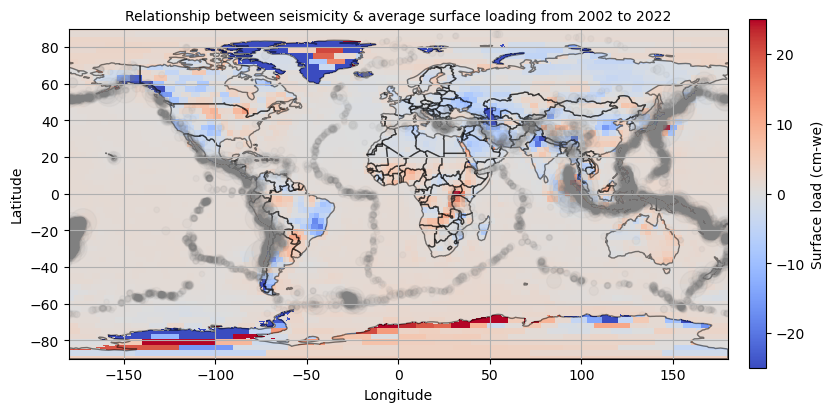

In [35]:
plt.style.use('default')

snapshot = np.mean(ds.lwe_thickness.to_numpy(), axis=0)
fig,ax = plt.subplots(figsize=(9,9))

grace_snapshot(20,80,'Relationship between seismicity & average surface loading from 2002 to 2022',10,snapshot,ax,'coolwarm',-25,True,'right',pad=0.03,fract=0.025)

/var/folders/8d/yjj_j8x10pd63nrz4jt7rhrh0000gn/T/ipykernel_67217/15551010.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


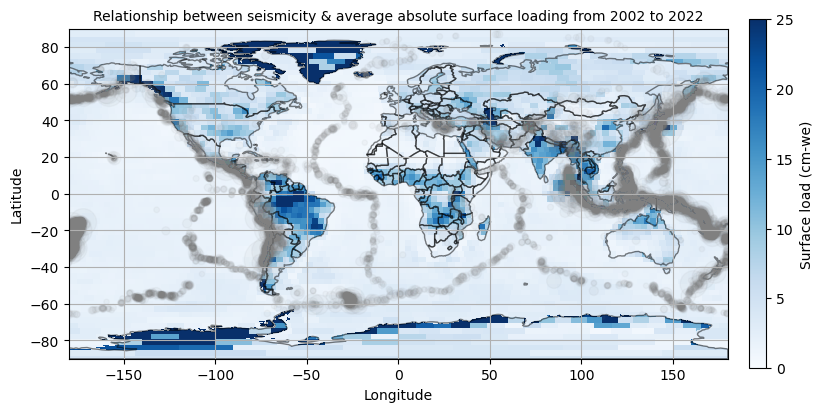

In [36]:
plt.style.use('default')

snapshot = np.mean(np.abs(ds.lwe_thickness.to_numpy()), axis=0)
fig,ax = plt.subplots(figsize=(9,9))

grace_snapshot(20,80,'Relationship between seismicity & average absolute surface loading from 2002 to 2022',10,snapshot,ax,'Blues',0,True,'right',pad=0.03,fract=0.025)

In [69]:
np.shape(ds['lwe_thickness'])

(205, 360, 720)

In [61]:
np.shape(ds['lwe_thickness'].data.flatten())

(53136000,)

In [68]:
np.shape(np.mean(np.abs(ds.lwe_thickness), axis=0))

(360, 720)

In [100]:
# ds['lwe_thickness'] is a 3D array of shape (205, 360, 720)
lwe_thickness = ds['lwe_thickness'].data

# Calculate the mean along time axis (axis=0 in this case)
mean_load = np.mean((lwe_thickness), axis=0)
abs_mean_load = np.abs(np.mean((lwe_thickness), axis=0))

# Flatten the resulting array while maintaining the original shape
mean_load_flat = mean_load.flatten()
abs_mean_load_flat = abs_mean_load.flatten()

# Verify the shapes
print("Original shape:", lwe_thickness.shape)
print("Mean absolute value shape:", mean_lwe_thickness.shape)
print("Flattened shape:", mean_lwe_thickness_flat.shape)

Original shape: (205, 360, 720)
Mean absolute value shape: (360, 720)
Flattened shape: (259200,)


288
288
287


/Users/amandasyamsul/SLIQ/loadquakes.py:236: RuntimeWarning: divide by zero encountered in divide
  cp = LgE/L
/Users/amandasyamsul/SLIQ/loadquakes.py:236: RuntimeWarning: invalid value encountered in divide
  cp = LgE/L


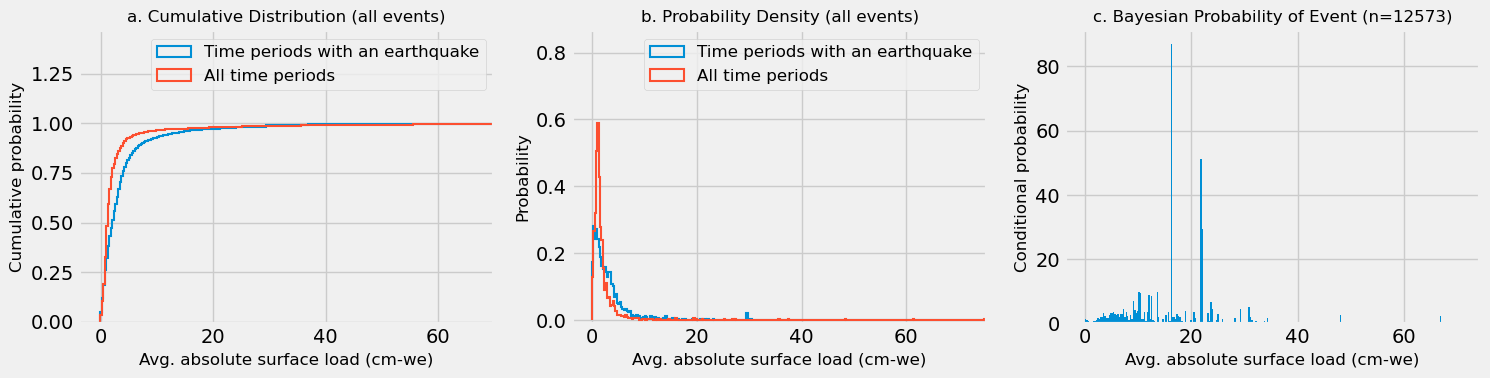

In [101]:
importlib.reload(loadquakes)

def all_figs(all_loads,full_catalog,etas_catalog,bayes_title1,bayes_title2,bayes_title3,xlab,method,fs):

    fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))

    plt.style.use('fivethirtyeight')
    
    loadquakes.plot_hist(all_loads, full_catalog, ax1, ax2, 
              'a. Cumulative Distribution (all events)', 'b. Probability Density (all events)', xlab,method,fs)

    loadquakes.plot_bayes(all_loads, full_catalog, ax3, bayes_title1,xlab,method,fs)

    fig.tight_layout()
    
all_figs(abs_mean_load_flat,
         np.abs(catalog.dmass),
         np.abs(etas_declustered.dmass),
         'c. Bayesian Probability of Event (n=12573)',
         'f. Bayesian Probability of Event (n=9865)',
         'i. Bayesian Probability of Event (n=537)',
         'Avg. absolute surface load (cm-we)',
         'fd',12)

402
402
401


/Users/amandasyamsul/SLIQ/loadquakes.py:236: RuntimeWarning: divide by zero encountered in divide
  cp = LgE/L
/Users/amandasyamsul/SLIQ/loadquakes.py:236: RuntimeWarning: invalid value encountered in divide
  cp = LgE/L


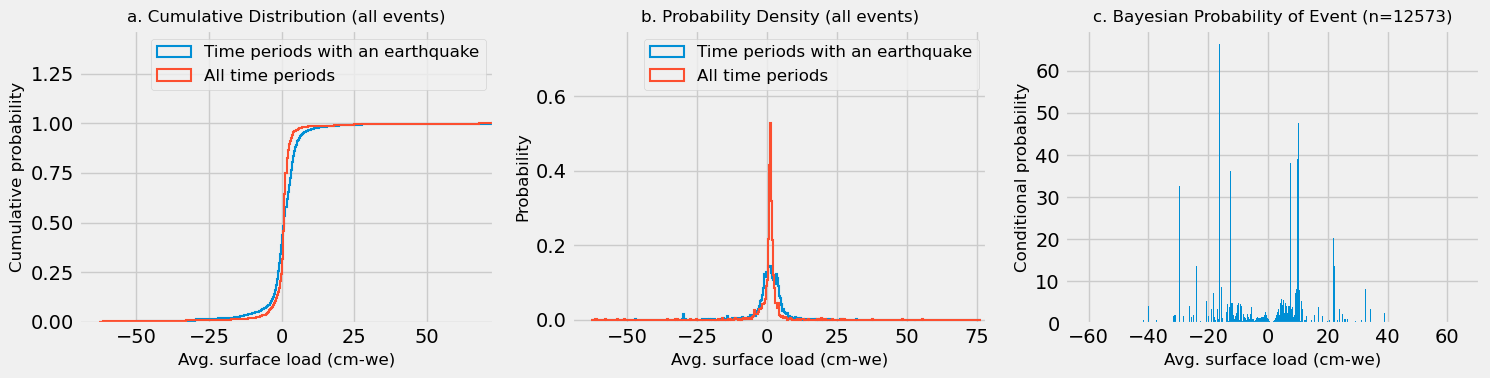

In [102]:
all_figs(mean_load_flat,
         catalog.dmass,
         etas_declustered.dmass,
         'c. Bayesian Probability of Event (n=12573)',
         'f. Bayesian Probability of Event (n=9865)',
         'i. Bayesian Probability of Event (n=537)',
         'Avg. surface load (cm-we)',
         'fd',12)

In [103]:
ds['lwe_thickness'].data

array([[[-4.04008224, -4.04008224, -4.04008224, ..., -4.04008224,
         -4.04008224, -4.04008224],
        [-4.04008224, -4.04008224, -4.04008224, ..., -4.04008224,
         -4.04008224, -4.04008224],
        [-4.04008224, -4.04008224, -4.04008224, ..., -4.04008224,
         -4.04008224, -4.04008224],
        ...,
        [-0.98015579, -0.98015579, -0.98015579, ..., -0.98015579,
         -0.98015579, -0.98015579],
        [-0.98015579, -0.98015579, -0.98015579, ..., -0.98015579,
         -0.98015579, -0.98015579],
        [-0.98015579, -0.98015579, -0.98015579, ..., -0.98015579,
         -0.98015579, -0.98015579]],

       [[-4.76217642, -4.76217642, -4.76217642, ..., -4.76217642,
         -4.76217642, -4.76217642],
        [-4.76217642, -4.76217642, -4.76217642, ..., -4.76217642,
         -4.76217642, -4.76217642],
        [-4.76217642, -4.76217642, -4.76217642, ..., -4.76217642,
         -4.76217642, -4.76217642],
        ...,
        [-3.51201848, -3.51201848, -3.51201848, ..., -

In [91]:
catalog

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,0,2,-55.5113,-128.4388,2022-01-15 18:23:04.127,5.7,POINT (-55.5113 -128.4388),5.4,0.0,6.907373e-11,0.998822,1.178415e-03,1.0,10.00,4.971506,0.939436
1,1,3,-20.5460,-175.3900,2022-01-15 04:14:45.000,5.8,POINT (-20.546 -175.39),5.4,0.0,6.907373e-11,0.998325,1.674875e-03,1.0,0.00,2.485465,1.146643
2,2,4,-7.0422,105.2063,2022-01-14 09:49:20.820,5.4,POINT (-7.0422 105.2063),5.4,0.0,6.907373e-11,0.999999,6.002016e-07,1.0,34.46,0.527750,1.068970
3,3,5,-6.8600,105.2887,2022-01-14 09:05:41.461,6.6,POINT (-6.86 105.2887),5.4,0.0,6.907373e-11,0.996362,3.637987e-03,1.0,33.00,0.527750,1.068970
4,4,6,-6.6002,147.3665,2022-01-12 13:16:21.730,5.6,POINT (-6.6002 147.3665),5.4,0.0,6.907373e-11,0.998980,1.020001e-03,1.0,80.00,2.113894,1.031600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12568,12568,12570,-16.3820,173.2590,2002-04-20 15:59:57.860,6.0,POINT (-16.382 173.259),5.4,0.0,6.907373e-11,0.981736,1.826392e-02,1.0,33.00,-1.649923,0.830483
12569,12569,12571,17.2330,-101.2500,2002-04-18 17:57:27.700,5.9,POINT (17.233 -101.25),5.4,0.0,6.907373e-11,0.999974,2.606205e-05,1.0,33.00,-2.669669,0.792210
12570,12570,12572,-27.5350,-70.5860,2002-04-18 16:08:36.780,6.7,POINT (-27.535 -70.586),5.4,0.0,6.907373e-11,0.978985,2.101521e-02,1.0,62.00,-1.934300,0.788454
12571,12571,12573,-60.6570,-25.8430,2002-04-18 14:17:23.940,5.8,POINT (-60.657 -25.843),5.4,0.0,6.907373e-11,0.999386,6.138115e-04,1.0,10.00,-2.905380,0.762105


In [88]:
etas_declustered.dmass

0     -2.223338
1      4.958631
2      6.793962
3      7.550109
4      3.625178
         ...   
532   -2.257767
533   -0.748401
534    9.932076
535   -5.129024
536   -1.027400
Name: dmass, Length: 537, dtype: float64